<a href="https://colab.research.google.com/github/TanChen168/sales-predictions/blob/main/SalesPredictionPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Initialize dataframe and clean up

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sample_data/sales_predictions.csv')
duplicate = df[df.duplicated()]
df['Item_Weight'].fillna(0, inplace = True)
df['Outlet_Size'].fillna("NA", inplace = True)

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})


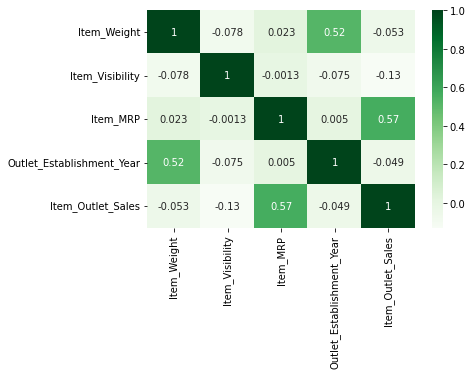

In [32]:
# Create correlation map

corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

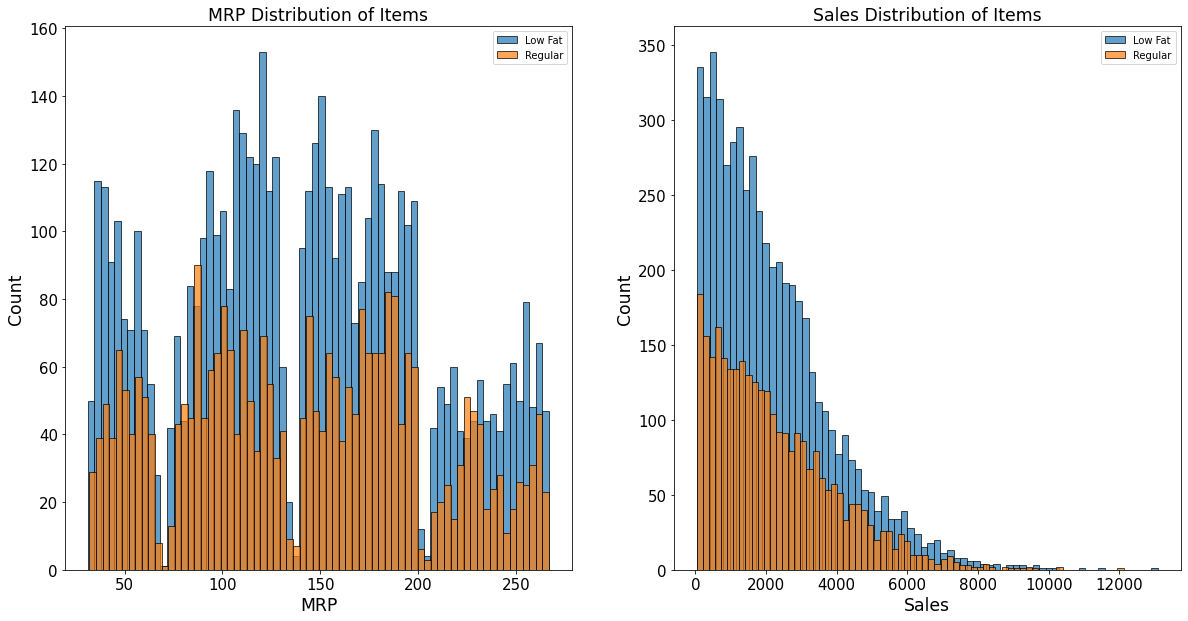

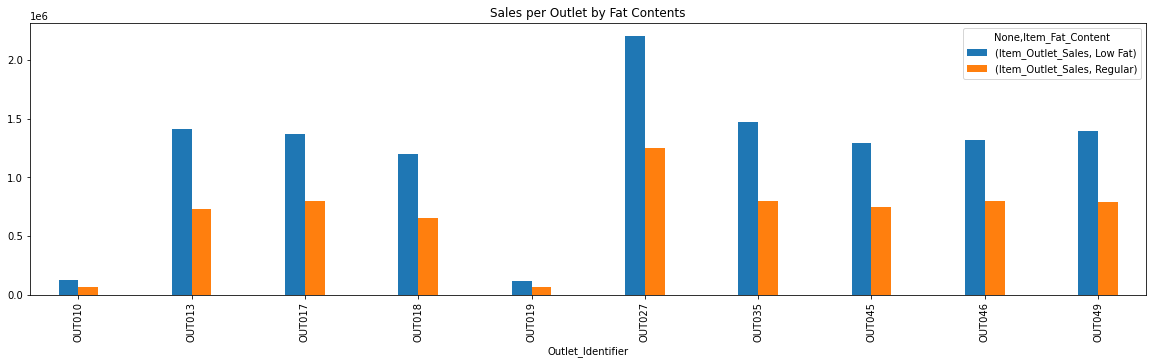

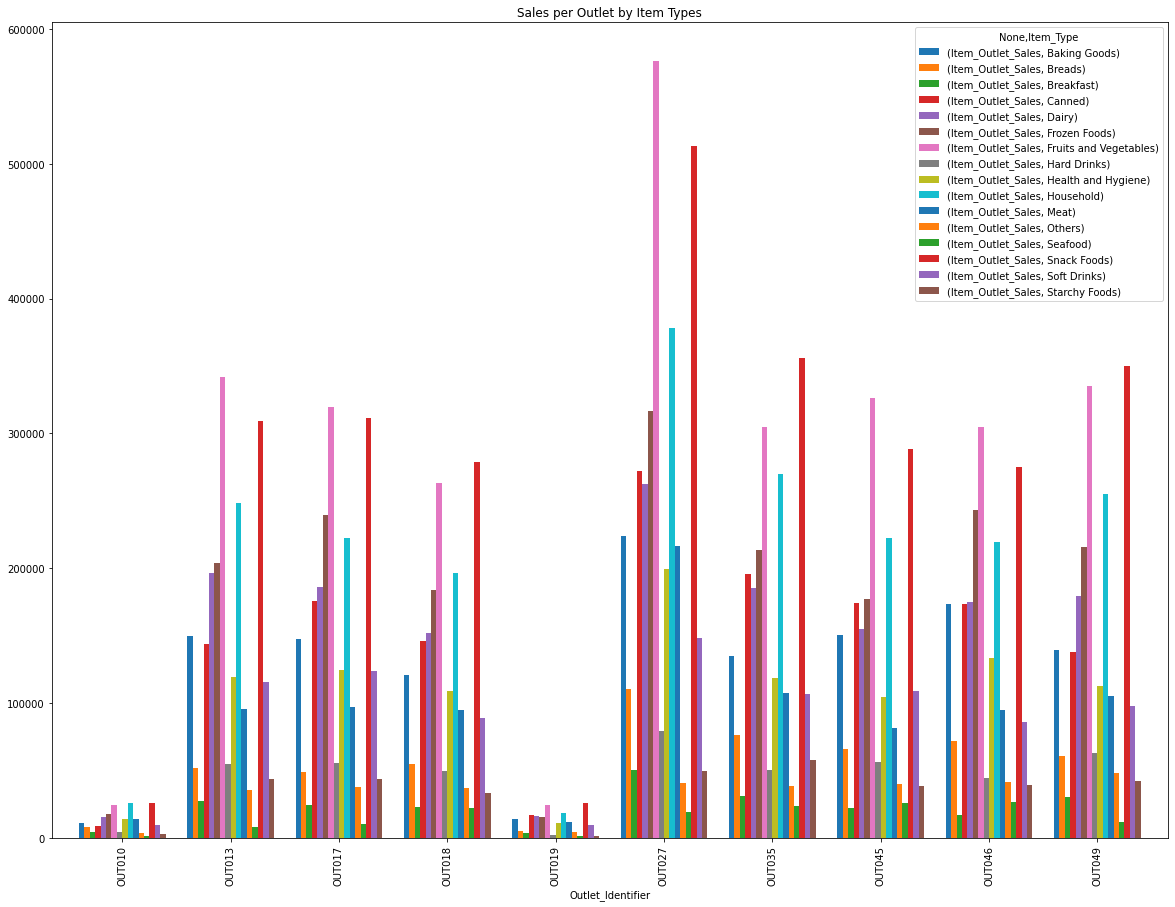

In [157]:
# Create reference graph filters and dataframes

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10));
lowfat_filter = df['Item_Fat_Content'] == 'Low Fat'
regular_filter = df['Item_Fat_Content'] == 'Regular'

df_lowfat = df.loc[lowfat_filter, :]
df_regular = df.loc[regular_filter, :]

# Item MRP Histogram
axes[0].title.set_text('MRP Distribution of Items')
axes[0].title.set_fontsize('xx-large')
axes[0].xaxis.set_label_text('MRP', fontsize='xx-large')
axes[0].yaxis.set_label_text('Count', fontsize='xx-large')
axes[0].tick_params(axis='both', labelsize=15)
axes[0].hist(df_lowfat['Item_MRP'], label='Low Fat', bins=70, edgecolor='black', alpha=0.7)
axes[0].hist(df_regular['Item_MRP'], label='Regular', bins=70, edgecolor='black', alpha=0.7)
axes[0].legend(loc='upper right')

# Item Sales Histogram
axes[1].title.set_text('Sales Distribution of Items')
axes[1].title.set_fontsize('xx-large')
axes[1].xaxis.set_label_text('Sales', fontsize='xx-large')
axes[1].yaxis.set_label_text('Count', fontsize='xx-large')
axes[1].tick_params(axis='both', labelsize=15)
axes[1].hist(df_lowfat['Item_Outlet_Sales'], label='Low Fat', bins=70, edgecolor='black', alpha=0.7)
axes[1].hist(df_regular['Item_Outlet_Sales'], label='Regular', bins=70, edgecolor='black', alpha=0.7)
axes[1].legend(loc='upper right')

# Sales by Outlet by Fat Content
df_sales_report = df.drop(columns=['Item_Weight', 'Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year'])
df_sales_report_by_Fat_Content = df_sales_report.groupby(['Outlet_Identifier', 'Item_Fat_Content']).sum().unstack().plot(kind='bar', width=0.35, figsize=(20,5), title='Sales per Outlet by Fat Contents')

# Sales by Outlet per Item Type
df_sales_report_by_Item_Type = df_sales_report.groupby(['Outlet_Identifier', 'Item_Type']).sum().unstack().plot(kind='bar', width=0.8, figsize=(20,15), title='Sales per Outlet by Item Types')

